# Hiding the information inside the image using Steganography

In [2]:
!pip install pillow numpy matplotlib

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.4 requires typer<1.0.0,>=0.3.0, which is not installed.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.


### Step 1:Import required libraries

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### STEP 2: Convert text to binary

In [13]:
def text_to_binary(text):
    return ''.join(format(ord(char), '08b') for char in text)

### STEP 3: Convert binary to text

In [16]:
def binary_to_text(binary_data):
    chars = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    return ''.join(chr(int(char, 2)) for char in chars if len(char) == 8)

### STEP 4: Encode message into image using LSB

In [21]:
def encode_image(image_path, secret_message, output_path):
    img = Image.open(image_path).convert("RGB")
    data = np.array(img)

    binary_secret = text_to_binary(secret_message) + '1111111111111110'  # EOF marker
    flat_data = data.flatten().astype(np.uint16)

    if len(binary_secret) > len(flat_data):
        raise ValueError("Message too long for this image!")

    for i in range(len(binary_secret)):
        flat_data[i] = (flat_data[i] & 0xFFFE) | int(binary_secret[i])

    new_data = flat_data.astype(np.uint8).reshape(data.shape)
    Image.fromarray(new_data).save(output_path)
    print(f"✅ Message successfully encoded in: {output_path}")

    # Show Encoded Image
    plt.imshow(Image.open(output_path))
    plt.axis('off')
    plt.title("🖼️ Encoded Image (subtle changes)")
    plt.show()

### STEP 5: Decode hidden message from stego image

In [24]:
def decode_image(stego_image_path):
    img = Image.open(stego_image_path).convert("RGB")
    data = np.array(img).flatten()

    binary_data = ''.join(str(value & 1) for value in data)
    eof = binary_data.find('1111111111111110')

    if eof != -1:
        binary_data = binary_data[:eof]
    else:
        print("⚠️ End-of-message marker not found. Output may be corrupted.")

    return binary_to_text(binary_data)

### STEP 6: Optional - Show Difference Image

In [27]:
def show_difference(original_path, stego_path):
    original = np.array(Image.open(original_path))
    stego = np.array(Image.open(stego_path))
    diff = np.abs(original.astype(int) - stego.astype(int))

    plt.imshow(diff)
    plt.axis('off')
    plt.title("🔍 Difference Image (changes are subtle)")
    plt.show()

### STEP 7: Run Everything

✅ Message successfully encoded in: C:\Users\saipr\Downloads\nature1_image.png


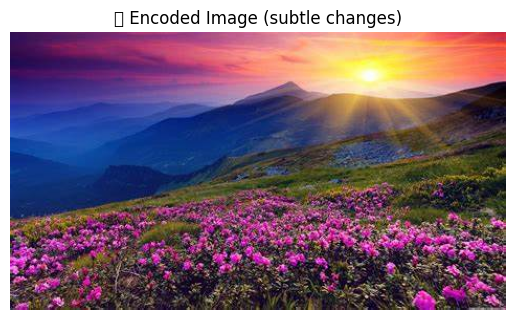

🔓 Revealed Message: Hello Ammu! This is a secret message!


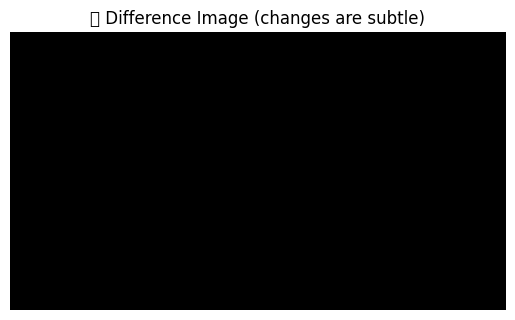

In [32]:
# Set your file paths
original_image_path = "C:\\Users\\saipr\\Downloads\\nature_image.png"
output_stego_path = "C:\\Users\\saipr\\Downloads\\nature1_image.png"
secret_text = "Hello Ammu! This is a secret message!"
# Encode the message
encode_image(original_image_path, secret_text, output_stego_path)

# Decode and reveal the message
hidden_message = decode_image(output_stego_path)
print("🔓 Revealed Message:", hidden_message)

# Show image differences (optional)
show_difference(original_image_path, output_stego_path)
